In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.preprocessing import StandardScaler

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()
X_train_flat=X_train.reshape((60000, 28*28))
X_train_flat.shape

#flat the X_test as well
X_test_flat=X_test.reshape((10000, 28*28))

In [3]:
#normalize and scale the feature design matrices
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)
X_train_scaled.shape, X_test_scaled.shape

((60000, 784), (10000, 784))

In [5]:
from sklearn.svm import SVC
#the first strategy: OVO
svm_ovo = SVC(kernel='rbf', decision_function_shape='ovo')
svm_ovo.fit(X_train_scaled, y_train)   

SVC(decision_function_shape='ovo')

In [6]:
#testing accuracy for OVO
import numpy as np
y_pred=svm_ovo.predict(X_test_scaled)
accuracy=np.mean(y_pred==y_test)
accuracy

0.966

In [4]:
#ovo technique      svm classification visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

In [5]:
import numpy as np
selected_part=np.isin(y_train, [0, 1, 2])
X_train_visualization_pca=X_pca[selected_part]
y_train_visualization=y_train[selected_part]

In [6]:
from sklearn.svm import SVC
svm_ovo = SVC(kernel='rbf', decision_function_shape='ovo')
svm_ovo.fit(X_train_visualization_pca, y_train_visualization)   

SVC(decision_function_shape='ovo')

In [10]:
#extract X from sub-training-set for visualization
first_200_visual=X_train_visualization_pca[:200]
first_200_visual
first_200_y=y_train_visualization[:200]
first_200_y.shape

(200,)

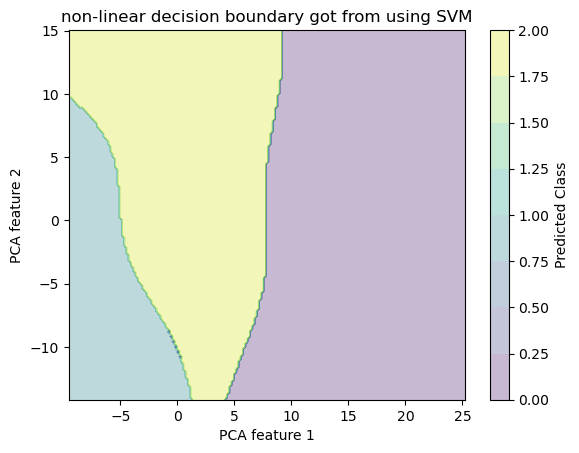

In [13]:
import matplotlib.pyplot as plt
def decision_boundary_visualization(X, svm_model, y):
    h=0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)    #reshaping the prediction result back to the original dimension

    contour=plt.contourf(xx, yy, Z, alpha=0.3)
    # scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
    # plt.legend(*scatter.legend_elements(), title="Classes")
    plt.colorbar(contour, label='Predicted Class')
    plt.xlabel("PCA feature 1")
    plt.ylabel("PCA feature 2")
    plt.title('non-linear decision boundary got from using SVM')
    plt.show()


decision_boundary_visualization(first_200_visual, svm_ovo, first_200_y)

In [15]:
#OVR strategy
svm_ovr = SVC(kernel='rbf', decision_function_shape='ovr')
svm_ovr.fit(X_train_scaled, y_train)

SVC()

In [17]:
y_predict_ovr=svm_ovr.predict(X_test_scaled)
np.mean(y_predict_ovr==y_test)

0.966